In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv(r'.\exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [17]:
# Select features for clustering
#features = ['Rating', 'Installs', 'Reviews', 'Size', 'Price']
features = ['reading score', 'writing score']

X = df[features]
X.head()

,reading score,writing score
0,70,78
1,93,87
2,76,77
3,70,63
4,85,86


C:\Users\Engineer\AppData\Local\Temp\ipykernel_10048\449679425.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


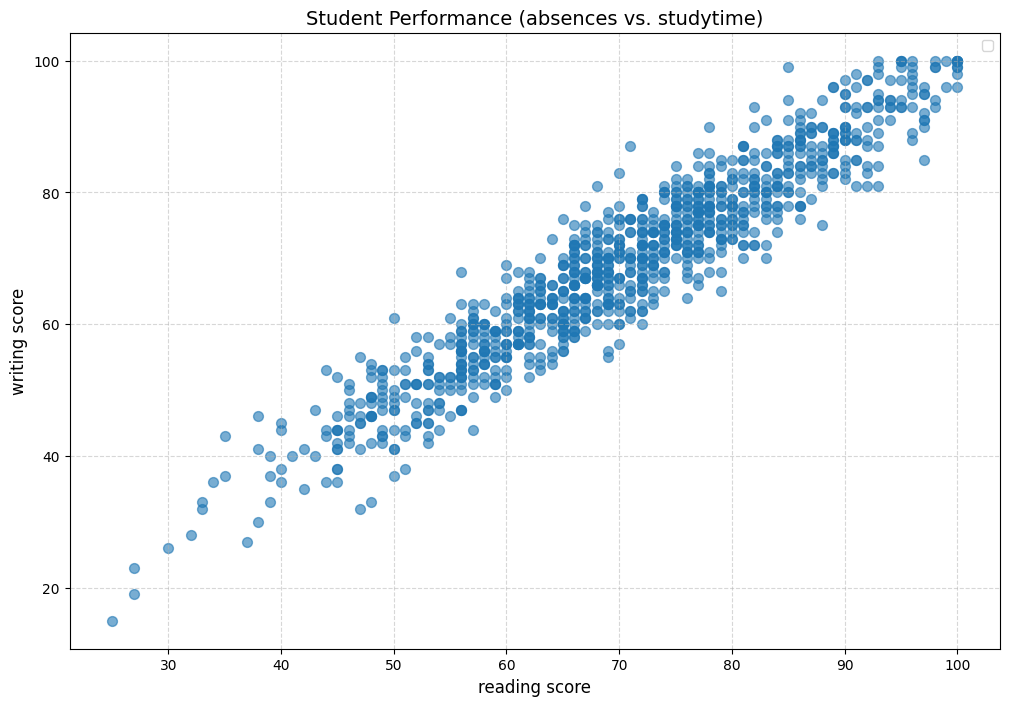

In [18]:
x = df[['reading score']]  # Feature (independent variable)
y = df['writing score']    # Target (dependent variable)

plt.figure(figsize=(12, 8))

# Create scatter plot with cluster colors
scatter = plt.scatter(
    x,          # X-axis: Rating
    y,        # Y-axis: Installs (log scale for better visibility)
    alpha=0.6,                   # Transparency
    s=50                         # Marker size
)


# Customize plot
plt.title('Student Performance (absences vs. studytime)', fontsize=14)
plt.xlabel('reading score', fontsize=12)
plt.ylabel('writing score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

In [34]:
def train_with_gradient_descent(x, y, learning_rate=0.05, epochs=50):
    m = 0.1  # Initial slope
    b = 1    # Initial intercept
    n = len(x)

    for epoch in range(epochs):
        total_m_gradient = 0
        total_b_gradient = 0

        for i in range(n):
            xi = x.iloc[i, 0]
            yi = y.iloc[i]

            # Predicted value
            y_pred = m * xi + b

            # Partial derivatives (gradients)
            error = y_pred - yi
            total_m_gradient += (2/n) * error * xi
            total_b_gradient += (2/n) * error

        # Update m and b using the average gradient
        m -= learning_rate * total_m_gradient
        b -= learning_rate * total_b_gradient

        # (Optional) Calculate loss for monitoring (print every 10 epochs)
        if epoch % 1 == 0:
            mse = 0
            for i in range(n):
                y_pred = m * x.iloc[i, 0] + b
                mse += (y.iloc[i] - y_pred) ** 2
            mse /= n
            print(f"Epoch {epoch}, MSE: {mse}")

    return m, b

# Run training
final_m, final_b = train_with_gradient_descent(x, y)

print(f"Final slope (m): {final_m}")
print(f"Final intercept (b): {final_b}")


Epoch 0, MSE: 1031195007.7879575
Epoch 1, MSE: 272798919788286.56
Epoch 2, MSE: 7.216797183983256e+19
Epoch 3, MSE: 1.9091777062450632e+25
Epoch 4, MSE: 5.050660869495782e+30
Epoch 5, MSE: 1.336134144831748e+36
Epoch 6, MSE: 3.534694763941861e+41
Epoch 7, MSE: 9.350907708305917e+46
Epoch 8, MSE: 2.473748960200003e+52
Epoch 9, MSE: 6.544213790769174e+57
Epoch 10, MSE: 1.731248191644764e+63
Epoch 11, MSE: 4.579954746131529e+68
Epoch 12, MSE: 1.2116105349796397e+74
Epoch 13, MSE: 3.205272038361554e+79
Epoch 14, MSE: 8.47943175079367e+84
Epoch 15, MSE: 2.2432031339568027e+90
Epoch 16, MSE: 5.934313109746551e+95
Epoch 17, MSE: 1.5699011628247808e+101
Epoch 18, MSE: 4.153116991738657e+106
Epoch 19, MSE: 1.098692144162298e+112
Epoch 20, MSE: 2.906550501816237e+117
Epoch 21, MSE: 7.689174683277121e+122
Epoch 22, MSE: 2.034143472580476e+128
Epoch 23, MSE: 5.381253304129951e+133
Epoch 24, MSE: 1.4235911829008754e+139
Epoch 25, MSE: 3.7660592086935426e+144
Epoch 26, MSE: 9.962974015113143e+149
Ep

ValueError: x and y must be the same size

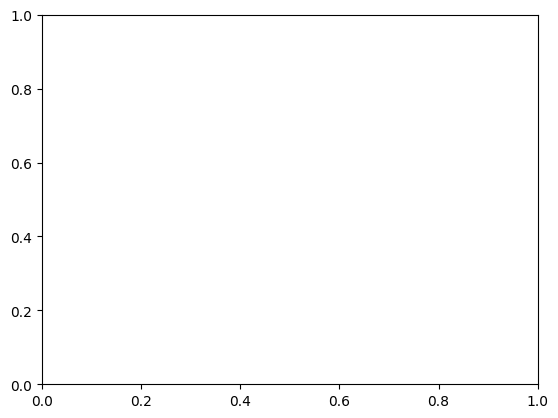

In [ ]:
y_pred = final_m*X + final_b 

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend()
plt.show()
